In [1]:

# Análise Fatorial PCA
# MBA em Data Science e Analytics USP ESALQ

# Prof. Dr. Wilson Tarantin Junior

In [2]:

!pip install pandas
!pip install numpy
!pip install factor_analyzer
!pip install sympy
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install pingouin
!pip install pyshp


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go
import sympy as sy
import scipy as sp

In [3]:

emprestimo = pd.read_excel("emprestimo_banco.xlsx")
# Fonte: adaptado de https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

In [4]:

emprestimo_pca = emprestimo.drop(columns=['ID'])

In [5]:

tab_desc = emprestimo_pca.describe()

In [6]:

# Matriz de correlações em um objeto "simples"

corr = emprestimo_pca.corr()

# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 600,
    width = 600,
    yaxis=dict(autorange="reversed"))

fig.show()

In [7]:

bartlett, p_value = calculate_bartlett_sphericity(emprestimo_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 25409.78
p-valor: 0.0


In [8]:

fa = FactorAnalyzer(n_factors=6, method='principal', rotation=None).fit(emprestimo_pca)

In [9]:

autovalores = fa.get_eigenvalues()[0]

print(autovalores)

[2.02800719 1.73665956 0.97645432 0.90872121 0.34441264 0.00574507]


In [10]:

# Há dois fatores derivados de autovalores > 1

fa = FactorAnalyzer(n_factors=2, method='principal', rotation=None).fit(emprestimo_pca)

In [11]:

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   2.028007   0.338001             0.338001
Fator 2   1.736660   0.289443             0.627444


In [12]:

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = emprestimo_pca.columns

print(tabela_cargas)

             Fator 1   Fator 2
Age         0.959012  0.271073
Experience  0.957367  0.277678
Income     -0.301979  0.837176
Family     -0.011960 -0.344334
CCAvg      -0.295701  0.800263
Mortgage   -0.113918  0.355280


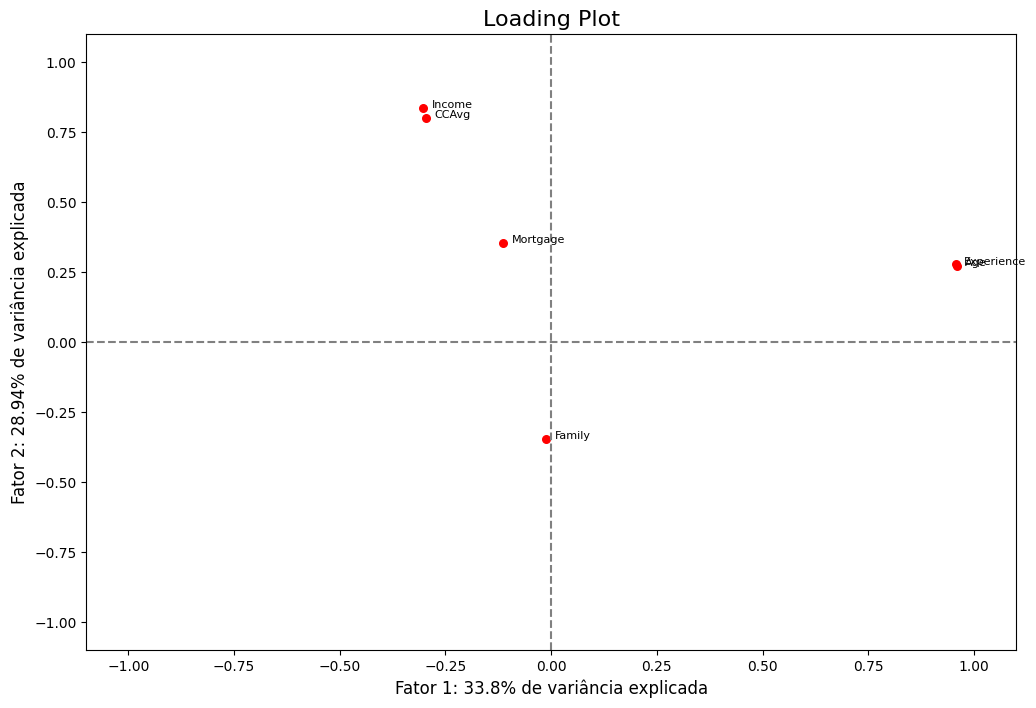

In [13]:

plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.02, point['y'], point['val'], fontsize=8)

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

In [14]:

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = emprestimo_pca.columns

print(tabela_comunalidades)

            Comunalidades
Age              0.993184
Experience       0.993658
Income           0.792054
Family           0.118709
CCAvg            0.727860
Mortgage         0.139201


In [15]:

fatores = pd.DataFrame(fa.transform(emprestimo_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

In [16]:

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = emprestimo_pca.columns

print(tabela_scores)

             Fator 1   Fator 2
Age         0.472884  0.156089
Experience  0.472073  0.159892
Income     -0.148904  0.482061
Family     -0.005898 -0.198274
CCAvg      -0.145809  0.460806
Mortgage   -0.056173  0.204577


In [17]:

# Analisando pelo loading plot, aplica-se a rotação dos eixos na origem (0,0)
# O método mais comum é a 'varimax', que é a rotação ortogonal dos fatores
# O objetivo é aumentar a carga fatorial em um fator e diminuir em outro
# Em resumo, trata-se de uma redistribuição de cargas fatoriais

In [18]:
# Basicamente é uma escolha de melhor solução mantendo os fatores ortogonais, assim tendo uma melhora solução 
# Aplicando a rotação aos 2 fatores extraídos

fa = FactorAnalyzer(n_factors=2, method='principal', rotation='varimax').fit(emprestimo_pca)

In [19]:

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

## Há a redistribuição da variância entre os fatores (mas o total é o mesmo!)

         Autovalor  Variância  Variância Acumulada
Fator 1   2.007323   0.334554             0.334554
Fator 2   1.757344   0.292891             0.627444


In [20]:

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = emprestimo_pca.columns

print(tabela_cargas)

## As cargas são alteradas: cargas fatoriais rotacionadas

             Fator 1   Fator 2
Age         0.996570  0.005748
Experience  0.996745  0.012552
Income     -0.067999  0.887373
Family     -0.103275 -0.328699
CCAvg      -0.071784  0.850122
Mortgage   -0.015137  0.372790


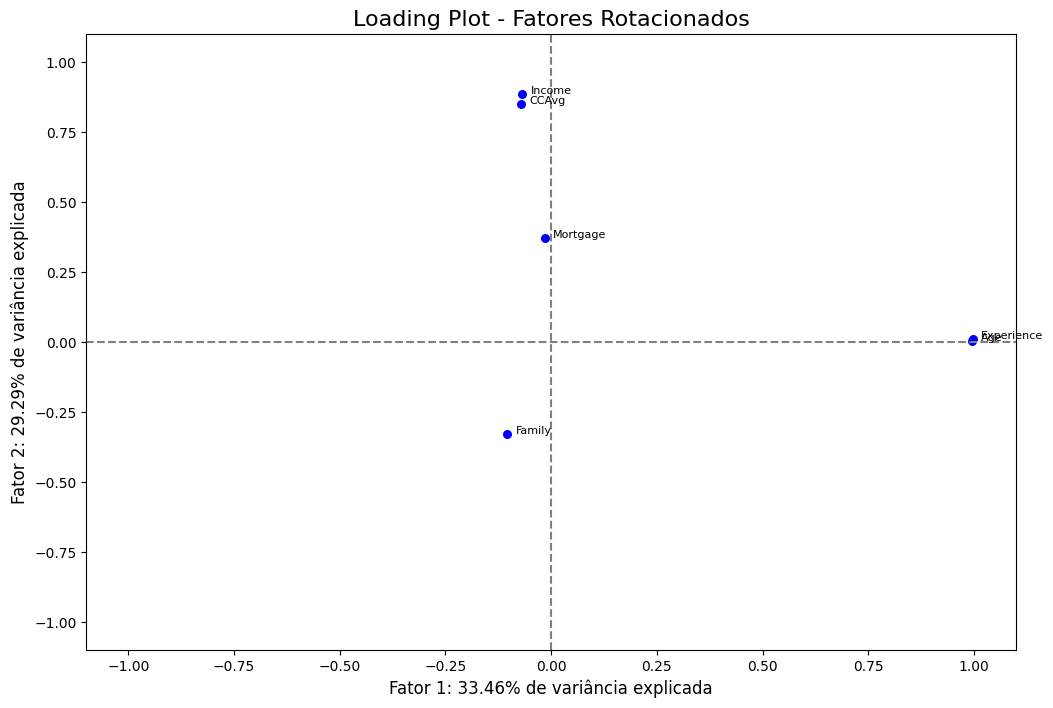

In [21]:
# se vc extrai os fatores e ve que está distribuido com cargas em ambos os fatores podemos rotacioar para melhore e tornar as varia veis mais relacionadas a um unico fator
plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30, color='blue')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.02, point['y'], point['val'], fontsize=8)

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot - Fatores Rotacionados", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

In [22]:

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = emprestimo_pca.columns

print(tabela_comunalidades)

## As comunalidades não mudam!

            Comunalidades
Age              0.993184
Experience       0.993658
Income           0.792054
Family           0.118709
CCAvg            0.727860
Mortgage         0.139201


In [23]:

fatores = pd.DataFrame(fa.transform(emprestimo_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

emprestimo = pd.concat([emprestimo.reset_index(drop=True), fatores], axis=1)

In [24]:

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = emprestimo_pca.columns

print(tabela_scores)

## Os scores são alterados, o que geram fatores rotacionados!

             Fator 1   Fator 2
Age         0.497378  0.024448
Experience  0.497610  0.028330
Income     -0.015077  0.504309
Family     -0.058514 -0.189535
CCAvg      -0.017757  0.482998
Mortgage    0.000367  0.212148


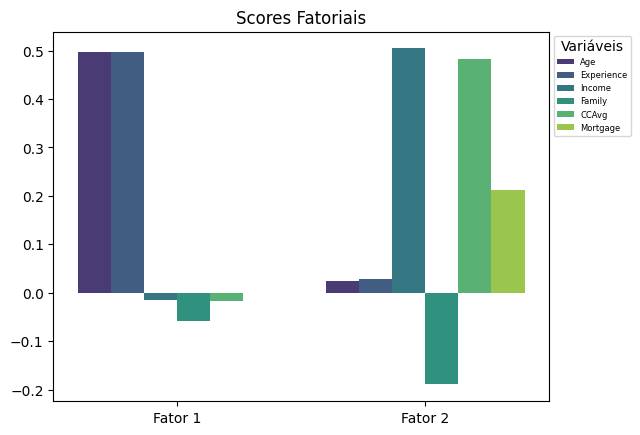

In [25]:

tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette='viridis')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

In [26]:

pg.rcorr(emprestimo[['Fator 1', 'Fator 2']], 
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

c:\Users\matheus.marchiore\AppData\Local\Programs\Python\Python39\lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,Fator 1,Fator 2
Fator 1,-,
Fator 2,0.0,-


In [ ]:
# consolida as informações fazendo com que tenha cargas bem mais atrelada a apenas um fator